In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("Mall_Customers.csv");
raw_data=df;

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


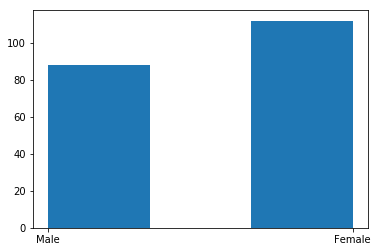

In [4]:
plt.hist([df['Genre']],bins=3);
plt.show();

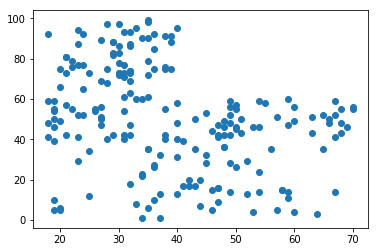

In [5]:
plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.show()
#Older people have lesser spending points

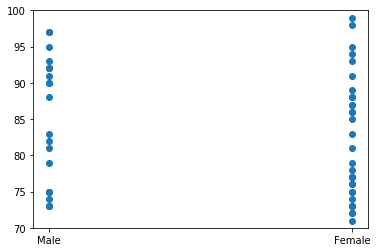

In [6]:
plt.scatter(df['Genre'],df['Spending Score (1-100)'],);
plt.ylim(70,100);
plt.show();
#The most spending points people are generally female

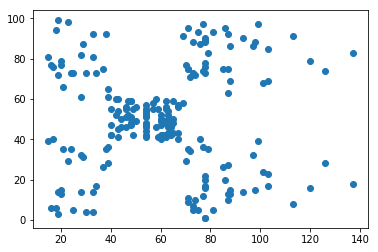

In [7]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)']);

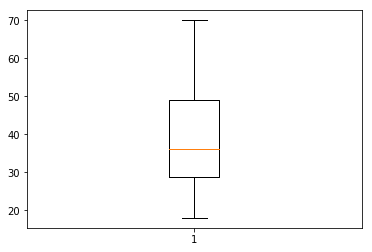

In [8]:
plt.boxplot(df['Age']);
plt.show;

In [9]:
df=df.replace(to_replace ="Male", 
                 value =1)
df=df.replace(to_replace ="Female", 
                 value =0)


In [10]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [11]:
range=df.max()-df.min();
min=df.min();
df=(df-min)/range

In [12]:
#k=4
k=df.sample(n=4)
k=k.reset_index(drop=True)

In [13]:
k

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.376884,1,0.153846,0.319672,0.540816
1,0.266332,1,0.788462,0.229508,0.602041
2,0.201005,0,0.903846,0.188525,0.346939
3,0.537688,1,0.692308,0.393443,0.459184


In [14]:
j=0;
Dist=pd.DataFrame();
Centroid=pd.DataFrame();


In [15]:
def cluster(S):
    plt.scatter(raw_data.loc[raw_data['Centroid']=='3'][S],raw_data.loc[raw_data['Centroid']=='3']['Spending Score (1-100)'],color='red');
    plt.scatter(raw_data.loc[raw_data['Centroid']=='2'][S],raw_data.loc[raw_data['Centroid']=='2']['Spending Score (1-100)'],color='green');
    plt.scatter(raw_data.loc[raw_data['Centroid']=='1'][S],raw_data.loc[raw_data['Centroid']=='1']['Spending Score (1-100)'],color='blue');
    plt.scatter(raw_data.loc[raw_data['Centroid']=='0'][S],raw_data.loc[raw_data['Centroid']=='0']['Spending Score (1-100)'],color='yellow');
    plt.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4']);
    plt.show();

In [16]:

while j<100:
    Dist=pd.DataFrame();
    Dist.insert(0,"0",((df-k.loc[0])**2).sum(axis=1));
    Dist.insert(1,"1",((df-k.loc[1])**2).sum(axis=1));
    Dist.insert(2,"2",((df-k.loc[2])**2).sum(axis=1));
    Dist.insert(3,"3",((df-k.loc[3])**2).sum(axis=1));
    
    Centroid=pd.DataFrame();
  

    Centroid.insert(0,"Centroid",Dist.idxmin(axis=1));

    mean=df.loc[Centroid['Centroid']=='0'].mean();
    k.loc[0]=mean;

    mean=df.loc[Centroid['Centroid']=='1'].mean();
    k.loc[1]=mean;

    mean=df.loc[Centroid['Centroid']=='2'].mean();
    k.loc[2]=mean;

    mean=df.loc[Centroid['Centroid']=='3'].mean();
    k.loc[3]=mean; 
    j=j+1;

        


In [17]:
raw_data.insert(5,"Centroid",Dist.idxmin(axis=1));

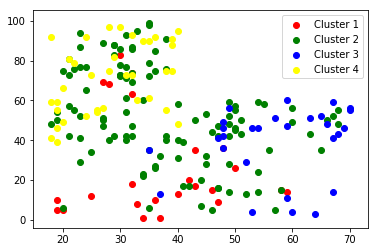

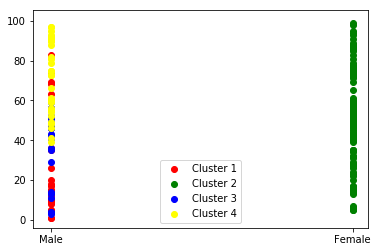

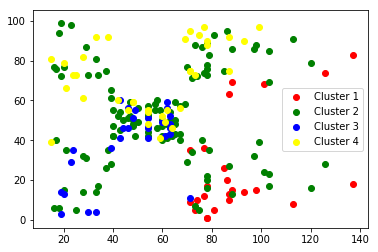

In [18]:
cluster('Age');
cluster('Genre');
cluster('Annual Income (k$)');